In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
%matplotlib inline

In [4]:
# Read csv file, convert time to datetime data type
df = pd.read_csv("flex_networks.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"], infer_datetime_format=True)

<AxesSubplot:xlabel='Timestamp'>

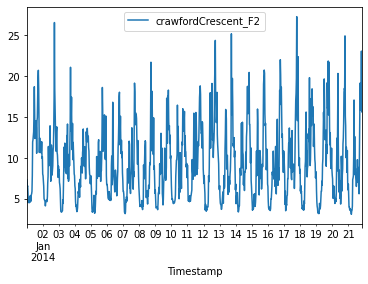

In [5]:
# Plot of example load
df.iloc[0:1000].plot(x="Timestamp", y="crawfordCrescent_F2")
#plt.savefig("test", dpi=100)


In [6]:
# Calculate total load
df["load_total"] = df.iloc[:, :22].sum(axis=1)
# Persistance forcast, shift total by a week (48 * 7 = 336)
df["pers_forecast"] = df["load_total"].shift(336, axis=0)

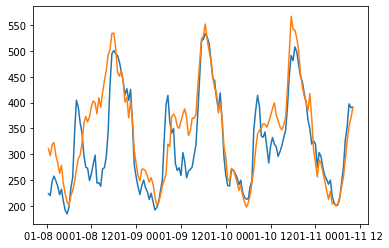

In [11]:
l = 336   # Begnning of graphed data, one week in
h = 500  # Last value of graphed data

plt.plot(df["Timestamp"].iloc[l:h], df["load_total"].iloc[l:h])
plt.plot(df["Timestamp"].iloc[l:h], df["pers_forecast"].iloc[l:h])


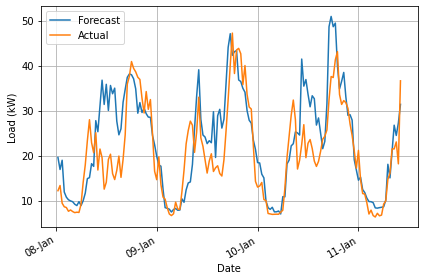

In [12]:
df['crawford_pers_forecast'] = df['crawfordCrescent_F3'].shift(336, axis=0)

fig, ax = plt.subplots()
ax.plot(df["Timestamp"].iloc[l:h], df["crawford_pers_forecast"].iloc[l:h], label="Forecast")
ax.plot(df["Timestamp"].iloc[l:h], df["crawfordCrescent_F3"].iloc[l:h], label="Actual")
# Major ticks every day
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.grid(True)
# Set labels to day number - month name
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
ax.set_ylabel("Load (kW)")
ax.set_xlabel("Date")
ax.legend()

plt.tight_layout()
plt.savefig("pers_forecast.jpg", dpi=300, bbox_inches="tight")
plt.show()

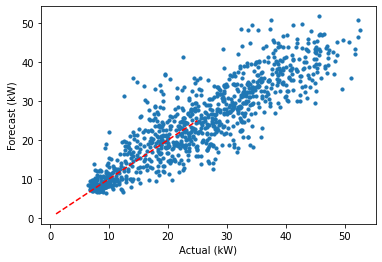

In [9]:
h=1344
plt.scatter(df["crawfordCrescent_F3"].iloc[l:h], df["crawford_pers_forecast"].iloc[l:h],s=10)
plt.plot([1,25], [1,25], c="r",ls="--")
plt.xlabel("Actual (kW)")
plt.ylabel("Forecast (kW)")
plt.savefig("linear.jpg", dpi=300)
plt.show()

In [13]:
# Calculate mean absolute error
error = df["crawford_pers_forecast"].iloc[l:h] - df["crawfordCrescent_F3"].iloc[l:h]
MAE = sum(abs(error)) / (h - l)
# Calculate mean absolute percentage error
MAPE = (100 / (h - l)) * sum(abs(error / df["crawfordCrescent_F3"].iloc[l:h]))

y_true = df["crawfordCrescent_F3"].iloc[7247:8687]
y_pred = df["crawford_pers_forecast"].iloc[7247:8687]

print(MAE)
print(mean_absolute_error(y_true, y_pred))
print(MAPE)
print(mean_absolute_percentage_error(y_true, y_pred))

5.385813414634143
3.159155624999999
28.971215270894294
0.19358471712869776


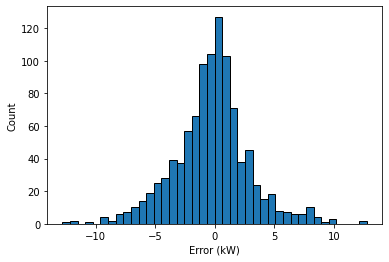

In [100]:
# Histogram of errors
plt.hist(error, bins='auto', edgecolor='black', linewidth=1)
plt.xlabel("Error (kW)")
plt.ylabel("Count")
plt.savefig("hist.jpg", dpi=300)
plt.show()

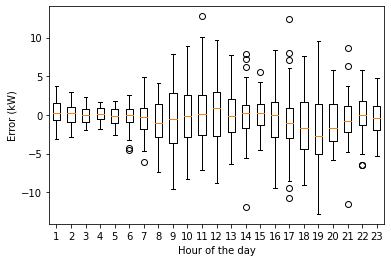

In [101]:
box_data =[]

for i in range(1,24):
    x = error.values[i*2::48]
    y = error.values[i*2-1::48]
    box_data.append(np.concatenate((x,y)))


plt.boxplot(box_data)
plt.xlabel("Hour of the day")
plt.ylabel("Error (kW)")
plt.savefig("boxplot.jpg", dpi=300)
plt.show()
